# Pandas

In [1]:
import pandas as pd
import numpy as np

In [10]:
#Lista
labels =['a','b','c']
my_data =[10,20,30]

#Array
v = np.array(my_data)

#Dicionario
d = {
    'a':10,
    'b':20,
    'c':30
}

### Parte 1 - Series

In [8]:
#Visualizar
pd.Series(data =my_data)

0    10
1    20
2    30
dtype: int64

In [9]:
pd.Series(data = my_data, index = labels)

a    10
b    20
c    30
dtype: int64

In [11]:
d

{'a': 10, 'b': 20, 'c': 30}

In [12]:
pd.Series(data = labels)

0    a
1    b
2    c
dtype: object

In [20]:
#padrao-> pd.Series(data, index)
ser1 = pd.Series([1,2,3],["Taubaté","Londres","Dublin"])
ser1

Taubaté    1
Londres    2
Dublin     3
dtype: int64

In [23]:
ser2 = pd.Series(["Taubaté","Londres","Dublin"])
ser2

0    Taubaté
1    Londres
2     Dublin
dtype: object

In [22]:
ser3 = pd.Series(index = [1,2,3],data =["Taubaté","Londres","Dublin"])
ser3

1    Taubaté
2    Londres
3     Dublin
dtype: object

In [34]:
a = pd.Series(index = ["Taubaté","Londres","Dublin"], data = [10,20,30])
b = pd.Series(index = ["Taubaté", "Londres", "Italia"], data = [10,20,40])

a+b

#Somar as tabelas com mesmo índices

Dublin      NaN
Italia      NaN
Londres    40.0
Taubaté    20.0
dtype: float64

### Parte 2 - DataFrame

In [36]:
from numpy.random import randn

In [38]:
randn(2,3)

array([[ 0.14612826,  0.16118978,  0.59943088],
       [-0.56366297,  0.91367728,  1.94386013]])

In [41]:
df = pd.DataFrame(randn(2,3),['A','B'],['x','y','z'])
df

,x,y,z
A,1.228554,0.347068,-0.467050
B,0.435970,-1.410627,1.756873


In [43]:
df['x']

A    1.228554
B    0.435970
Name: x, dtype: float64

In [44]:
df['y']

A    0.347068
B   -1.410627
Name: y, dtype: float64

In [48]:
df.y #Mesma coisa

A    0.347068
B   -1.410627
Name: y, dtype: float64

In [54]:
df[['x','y']]

,x,y
A,1.228554,0.347068
B,0.435970,-1.410627


In [84]:
#New coluna
df['new'] = df['x'] + 100*df['y']
df

,x,y,z,new2,new
A,1.228554,0.347068,-0.467050,100,35.935363
B,0.435970,-1.410627,1.756873,100,-140.626727


In [85]:
df['new2'] = 100
df

,x,y,z,new2,new
A,1.228554,0.347068,-0.467050,100,35.935363
B,0.435970,-1.410627,1.756873,100,-140.626727


In [86]:
#Remover Coluna
df.drop('new',axis = 1,inplace = True)
df.drop('new2',axis = 1,inplace = True)

In [87]:
df

,x,y,z
A,1.228554,0.347068,-0.467050
B,0.435970,-1.410627,1.756873


In [90]:
df.drop('B',axis = 0, inplace = True)

In [91]:
df

,x,y,z
A,1.228554,0.347068,-0.46705


In [93]:
df['x']

A    1.228554
Name: x, dtype: float64

In [95]:
df[['x','z']]

,x,z
A,1.228554,-0.46705


In [96]:
df

,x,y,z
A,1.228554,0.347068,-0.46705


In [105]:
df.loc[['A'],['x','y']]

,x,y
A,1.228554,0.347068


### Parte 3 - Missing Data

In [1]:
import numpy as np
import pandas as pd

In [6]:
d = {'A':[1,2,None],'B':[5,np.nan,np.nan],'C':[1,2,3]}

df = pd.DataFrame(d)
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [7]:
#Retira as colunas que não tem valor
df.dropna(axis=1)


,C
0,1
1,2
2,3


In [10]:
#Retira as linhas sem valor
df.dropna(axis=0)

,A,B,C
0,1.0,5.0,1


In [16]:
df.dropna(thresh = 2) 
# Retira a tabela que tenha 2 ou mais None

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [17]:
df.fillna(value = "Sem nada")

,A,B,C
0,1,5,1
1,2,Sem nada,2
2,Sem nada,Sem nada,3


In [19]:
df["A"].fillna(value = df["A"].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

### Part 4 - Pandas - Groupby

In [3]:
data = {
    'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
    'Person':['Sam','Charlie',"Amy",'Vanessa','Carl','Sarah'],
    'Sales':[200,120,340,124,243,350]
}

In [4]:
df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


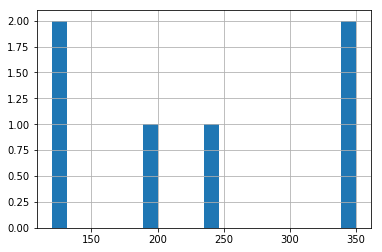

In [18]:
import matplotlib.pyplot as plt
df['Sales'].hist(bins = 20)

In [26]:
byComp = df.groupby('Company')
byComp.mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [27]:
byComp.sum()

,Sales
Company,
FB,593
GOOG,320
MSFT,464


In [28]:
byComp.std()

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [30]:
byComp.sum().loc['FB']

Sales    593
Name: FB, dtype: int64

In [31]:
byComp.count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [32]:
byComp.max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [36]:
byComp.describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [37]:
byComp.describe().transpose()

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

In [43]:
byComp.describe().transpose()['FB']

Sales  count      2.000000
       mean     296.500000
       std       75.660426
       min      243.000000
       25%      269.750000
       50%      296.500000
       75%      323.250000
       max      350.000000
Name: FB, dtype: float64

In [49]:
byComp['Sales'].max()

Company
FB      350
GOOG    200
MSFT    340
Name: Sales, dtype: int64

In [51]:
byComp['Sales'].sum()

Company
FB      593
GOOG    320
MSFT    464
Name: Sales, dtype: int64

### Parte 5 - Merging, Joining, and Concatenating

In [62]:
data1 = {
    'A':np.arange(0,4),
    'B':np.arange(4,8),
    'C':np.arange(8,12)
}
index1 = [0,1,2,3]

df1 = pd.DataFrame(data1,index1)
df1

,A,B,C
0,0,4,8
1,1,5,9
2,2,6,10
3,3,7,11


In [59]:
data2 = {
    'A':np.arange(12,16),
    'B':np.arange(16,20),
    'C':np.arange(20,24)
}
index2 = [4,5,6,7]

df2 = pd.DataFrame(data2,index2)
df2

,A,B,C
4,12,16,20
5,13,17,21
6,14,18,22
7,15,19,23


In [60]:
data3 = {
    'A':np.arange(24,28),
    'B':np.arange(28,32),
    'C':np.arange(32,36)
}
index3 = [8,9,10,11]

df3 = pd.DataFrame(data3,index3)
df3

,A,B,C
8,24,28,32
9,25,29,33
10,26,30,34
11,27,31,35


#### Concatenation (Todas Colunas devem ser iguais)

In [63]:
pd.concat([df1,df2,df3])

,A,B,C
0,0,4,8
1,1,5,9
2,2,6,10
3,3,7,11
4,12,16,20
5,13,17,21
6,14,18,22
7,15,19,23
8,24,28,32
9,25,29,33


In [67]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,A,B,C,A,B,C
0,0.0,4.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,5.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,6.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,7.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,12.0,16.0,20.0,NaN,NaN,NaN
5,NaN,NaN,NaN,13.0,17.0,21.0,NaN,NaN,NaN
6,NaN,NaN,NaN,14.0,18.0,22.0,NaN,NaN,NaN
7,NaN,NaN,NaN,15.0,19.0,23.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,24.0,28.0,32.0
9,NaN,NaN,NaN,NaN,NaN,NaN,25.0,29.0,33.0


#### Merging (tem que ter pelo menos uma coluna repetida)

In [89]:
data1 = {
    'A':['A0','A1','A2'],
    'key':['K0','K1','K2']
}


mg1 = pd.DataFrame(data1)
mg1

,A,key
0,A0,K0
1,A1,K1
2,A2,K2


In [90]:
data2 = {
    'B':['B0','B1','B2'],
    'key':['K0','K1','K2']
}


mg2 = pd.DataFrame(data2)
mg2

,B,key
0,B0,K0
1,B1,K1
2,B2,K2


In [91]:
pd.merge(mg1,mg2)
#Só funciona se tiver uma coluna igual... por isso
#coloquei a 'Key'

,A,key,B
0,A0,K0,B0
1,A1,K1,B1
2,A2,K2,B2


In [92]:
pd.merge(right = mg1, left = mg2)


,B,key,A
0,B0,K0,A0
1,B1,K1,A1
2,B2,K2,A2


#### Joining ( Não precisa de coluna repetida)

In [100]:
data1 = {
    'A':np.arange(0,4),
    'B':np.arange(4,8),
    'C':np.arange(8,12)
}


df1 = pd.DataFrame(data1)
df1

,A,B,C
0,0,4,8
1,1,5,9
2,2,6,10
3,3,7,11


In [99]:
data2 = {
    'D':np.arange(12,16),
    'E':np.arange(16,20),
    'F':np.arange(20,24)
}


df2 = pd.DataFrame(data2)
df2

,D,E,F
0,12,16,20
1,13,17,21
2,14,18,22
3,15,19,23


In [101]:
df1.join(df2)

,A,B,C,D,E,F
0,0,4,8,12,16,20
1,1,5,9,13,17,21
2,2,6,10,14,18,22
3,3,7,11,15,19,23


### Parte 6 - Operations

In [2]:
data1 = {
    'col1':[1,2,3,4],
    'col2':[444,555,666,444],
    'col3':['abc','def','ghi','xyz']
}

df = pd.DataFrame(data = data1)
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [4]:
df['col2'].unique()

array([444, 555, 666])

In [5]:
len(df['col2'].unique())

3

In [7]:
df['col2'].value_counts()#Contador

444    2
555    1
666    1
Name: col2, dtype: int64

In [11]:
df[df['col1']>2]

,col1,col2,col3
2,3,666,ghi
3,4,444,xyz


In [12]:
df['col1']>2

0    False
1    False
2     True
3     True
Name: col1, dtype: bool

In [14]:
df[(df['col1']>2) & (df['col2'] == 444)]

,col1,col2,col3
3,4,444,xyz


In [15]:
def times2(x):
    return x*2

In [17]:
df['col1'].apply(times2) 
# Apply usar quando tem funcao

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [20]:
df['col2'].apply(lambda x: x*2)

0     888
1    1110
2    1332
3     888
Name: col2, dtype: int64

In [23]:
df.drop('col1',axis=1) # retirar col 1

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [26]:
df.drop(2,axis=0) # Retirar linhas 2

,col1,col2,col3
0,1,444,abc
1,2,555,def
3,4,444,xyz


In [27]:
df.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [28]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [35]:
df.sort_values('col2') 
#Organiza os valores repetidos

,col1,col2,col3
0,1,444,abc
3,4,444,xyz
1,2,555,def
2,3,666,ghi


In [36]:
df.isnull()

,col1,col2,col3
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False


### Parte 7 - Data Input and Output

In [39]:
import pandas as pd

In [42]:
df = pd.read_csv('./dados_panda/dados.csv')
df

,Inf,Miguel,Priscila
0,Gasto,100,1000
1,Ganho,3500,3500
2,Lucro,3400,2500


In [47]:
#Criar
df.to_csv('./dados_panda/My_output',index = False)

In [51]:
pd.read_csv('./dados_panda/My_output')

,Inf,Miguel,Priscila
0,Gasto,100,1000
1,Ganho,3500,3500
2,Lucro,3400,2500


In [54]:
data1 = {
    'miguel':[1,2,3,4],
    'priscila':[5,6,7,8],
}

df1 = pd.DataFrame(data = data1)
df1

,miguel,priscila
0,1,5
1,2,6
2,3,7
3,4,8


In [61]:
#Criei arquivo
df1.to_csv('./dados_panda/teste.txt') # Ok
df1.to_csv('./dados_panda/teste') # Ok
#df1.to_csv('./dados_panda/teste.csv') #BUG...

#### html

dica: Instalar lxml

In [3]:
data = pd.read_html('https://www.fdic.gov/bank/individual/failed/banklist.html')

#### Lista html
No HTML, as listas são dada como < li > ou < tr >

In [9]:
data[0]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
1,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
2,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019"
3,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019"
4,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.","May 31, 2019"
5,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017"
6,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,"October 13, 2017"
7,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017"
8,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017"
9,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017"


In [8]:
data[0].head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
1,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
2,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019"
3,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019"
4,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.","May 31, 2019"


In [10]:
datax = pd.read_html('https://exame.abril.com.br/seu-dinheiro/os-precos-dos-carros-mais-vendidos-do-brasil-em-2016/')

In [23]:
datax[1]

,Versão,Preço
0,HB20 Copa do Mundo 1.0 Flex 12V Mec,"R$ 41.883,00"
1,HB20 Comf./C.Plus/C.Style 1.0 Flex 12V,"R$ 42.448,00"
2,HB20 Comfort Plus 1.0 TB Flex 12V Mec,"R$ 47.747,00"
3,HB20 Copa do Mundo 1.6 Flex 16V Aut.,"R$ 48.801,00"
4,HB20 C./C.Plus/C.Style 1.6 Flex 16V Mec,"R$ 51.112,00"
5,HB20 C.Style/C.Plus 1.6 Flex 16V Aut,"R$ 55.742,00"
